In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline

In [3]:
pamella = pd.read_csv('marketing_customer_analysis.csv')
pamella

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [4]:
numericalcol=pamella._get_numeric_data()
numericalcol

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [5]:
Y=numericalcol["Total Claim Amount"]
numericalcol_x=numericalcol.drop(["Number of Policies","Total Claim Amount"],axis=1)
Y

0        384.811147
1       1131.464935
2        566.472247
3        529.881344
4        138.130879
           ...     
9129     198.234764
9130     379.200000
9131     790.784983
9132     691.200000
9133     369.600000
Name: Total Claim Amount, Length: 9134, dtype: float64

In [6]:
pamella.columns = pamella.columns.str.lower().str.replace(' ', '_')
pamella.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [7]:
pamella.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [8]:
objectcol=pamella.select_dtypes('object')
objectcol

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


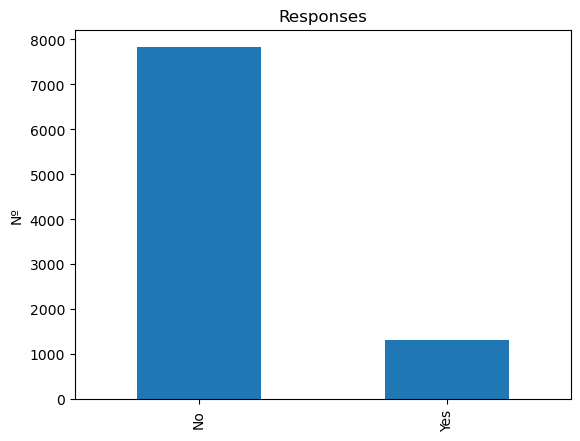

In [9]:
responses = pamella['response'].value_counts()

responses.plot(kind='bar')
plt.title('Responses')
plt.ylabel('Nº')
plt.show()

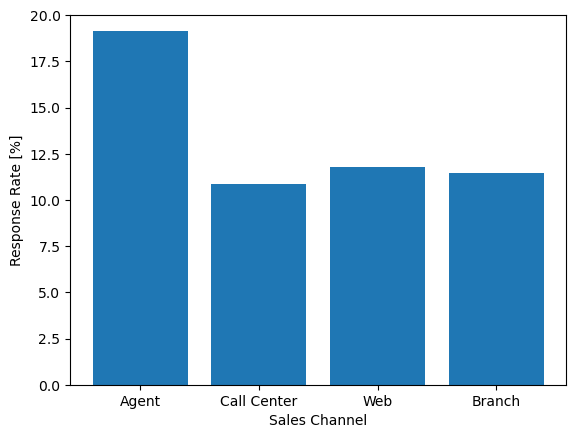

In [10]:
sales_channels=[]
resp_rates=[]
for channel in pamella['sales_channel'].unique():
    sales_channels.append(channel)
    filtered=pamella[(pamella['sales_channel']==channel)]
    tot_resp=filtered['response'].count()
    yes_resp=filtered['response'].value_counts()['Yes']
    percentage = yes_resp/tot_resp*100
    resp_rates.append(percentage)
    
plt.bar(x=sales_channels, height=resp_rates)
plt.xlabel("Sales Channel")
plt.ylabel("Response Rate [%]")
plt.ylim(0,20)
plt.show()

<AxesSubplot:>

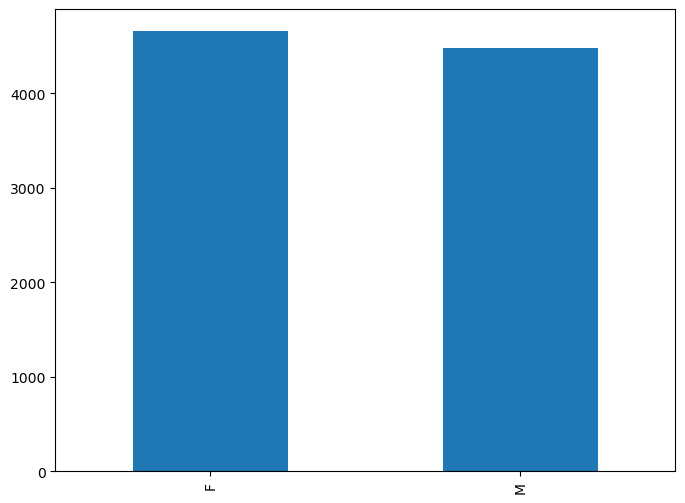

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
from sklearn.preprocessing import LabelEncoder
pamella['gender'].value_counts().plot(kind='bar')

In [12]:
from sklearn.preprocessing import LabelEncoder

numerical = pamella.select_dtypes(include=np.number)
categorical = pamella.select_dtypes(include=object)
numerical['income'] = numerical['income'].replace(0, numerical['income'].mean())
for col in categorical.columns:
    categorical[col]=LabelEncoder().fit(categorical[col]).transform(categorical[col])
categorical.drop(['customer','effective_to_date', 'response', 'vehicle_class','policy' ],axis = 1,inplace = True)
numerical.drop(['number_of_open_complaints'],axis= 1, inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

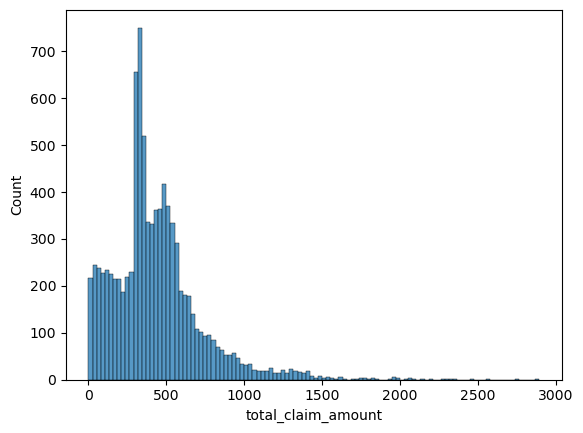

In [13]:
sns.histplot(pamella['total_claim_amount'])
plt.show

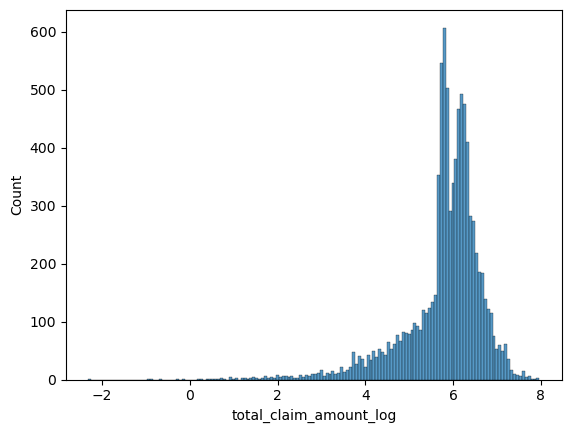

In [14]:
pamella['total_claim_amount_log'] = np.log(pamella['total_claim_amount'])
sns.histplot(pamella['total_claim_amount_log'])
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder

for col in categorical.columns:
    categorical[col]=LabelEncoder().fit(categorical[col]).transform(categorical[col])

categorical

,state,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_size
0,4,0,0,1,0,1,1,0,0,0,1
1,0,1,0,4,0,1,2,1,2,0,1
2,2,2,0,1,0,1,1,1,0,0,1
3,1,0,0,4,1,1,1,0,0,2,1
4,4,0,0,1,1,0,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9129,1,0,0,1,1,2,1,1,1,3,1
9130,1,1,1,1,0,1,0,0,0,1,1
9131,1,1,0,4,1,1,2,0,0,1,1
9132,1,1,1,1,1,1,1,1,2,1,0


In [17]:
from sklearn.preprocessing import OneHotEncoder

for col in categorical.columns:
    one_hot = pd.DataFrame(OneHotEncoder().fit(pd.DataFrame(categorical[col])).transform(pd.DataFrame(categorical[col])).toarray())
    
one_hot

,0,1,2
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
9129,0.0,1.0,0.0
9130,0.0,1.0,0.0
9131,0.0,1.0,0.0
9132,1.0,0.0,0.0


In [18]:
Y = numerical["total_claim_amount"].reset_index(drop=True)

In [19]:
numerical.drop(['total_claim_amount'],axis=1,inplace=True)

In [20]:
X = pd.DataFrame(np.concatenate((numerical,one_hot),axis=1)).reset_index(drop=True)
X

,0,1,2,3,4,5,6,7,8
0,2763.519279,56274.000000,69.0,32.0,5.0,1.0,0.0,1.0,0.0
1,6979.535903,37657.380009,94.0,13.0,42.0,8.0,0.0,1.0,0.0
2,12887.431650,48767.000000,108.0,18.0,38.0,2.0,0.0,1.0,0.0
3,7645.861827,37657.380009,106.0,18.0,65.0,7.0,0.0,1.0,0.0
4,2813.692575,43836.000000,73.0,12.0,44.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941.000000,73.0,18.0,89.0,2.0,0.0,1.0,0.0
9130,3096.511217,21604.000000,79.0,14.0,28.0,1.0,0.0,1.0,0.0
9131,8163.890428,37657.380009,85.0,9.0,37.0,2.0,0.0,1.0,0.0
9132,7524.442436,21941.000000,96.0,34.0,3.0,3.0,1.0,0.0,0.0


In [22]:
numerical.columns

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies
0,2763.519279,56274.000000,69,32,5,1
1,6979.535903,37657.380009,94,13,42,8
2,12887.431650,48767.000000,108,18,38,2
3,7645.861827,37657.380009,106,18,65,7
4,2813.692575,43836.000000,73,12,44,1
...,...,...,...,...,...,...
9129,23405.987980,71941.000000,73,18,89,2
9130,3096.511217,21604.000000,79,14,28,1
9131,8163.890428,37657.380009,85,9,37,2
9132,7524.442436,21941.000000,96,34,3,3


In [23]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_policies
0,2763.519279,56274.000000,69,32,5,1
1,6979.535903,37657.380009,94,13,42,8
2,12887.431650,48767.000000,108,18,38,2
3,7645.861827,37657.380009,106,18,65,7
4,2813.692575,43836.000000,73,12,44,1
...,...,...,...,...,...,...
9129,23405.987980,71941.000000,73,18,89,2
9130,3096.511217,21604.000000,79,14,28,1
9131,8163.890428,37657.380009,85,9,37,2
9132,7524.442436,21941.000000,96,34,3,3


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.4,random_state=100)

In [25]:
pamella.drop(['effective_to_date'],axis=1,inplace=True)

In [26]:
import statsmodels.api as sm

model = sm.OLS(y_train,X_train).fit()

In [27]:
predictions = model.predict(X_test)

In [28]:
r2_score(y_test,predictions)

0.4374838627009624

In [29]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print(mse)

44693.541686615645


In [30]:
import math

rmse = math.sqrt(mse)
print(rmse)

211.40847117988352


In [31]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predictions)
print(mae)

148.88093031262085


In [32]:
pamella

,customer,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,total_claim_amount_log
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,5.952753
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,7.031268
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,6.339428
3,WW63253,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,6.272653
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,4.928202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,Employed,M,71941,Urban,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,5.289452
9130,PK87824,California,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,5.938064
9131,TD14365,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,6.673026
9132,UP19263,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,6.538429
